<a href="https://colab.research.google.com/github/saif-byte/DataSciencePortfolio/blob/main/Credit%20Card%20Defaulter/Defaulter_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Default of credit card clients

In this project we will train a model to predict whether a customer of a bank will get defaulted or not. This model is trained using previous attributes of customers who get defaulted. The dataset of for this project is from UCL Machine Repository named as [default of credit card clients Data Set](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). 
The banks can use this model to predict whether a customer should be given credit or which customer is going to get default.

In [527]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import mutual_info_score, confusion_matrix,f1_score,precision_score,recall_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from IPython.display import display 
import warnings
%matplotlib inline

##Data Reading and PreProcessing

In [464]:
df = pd.read_excel("/content/default of credit card clients.xls")

In [465]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [466]:
#As column names are in first row , we must make them columns
df.columns = df.iloc[0]
#Also drop the first row so its not duplicated
df = df.drop(df.index[0])

In [467]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [468]:
#as there are many columns, we can check all columns as 
df.head().T

,1,2,3,4,5
0,,,,,
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1


In [469]:
#now let us look into datatypes of our columns
df.dtypes

0
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [470]:
#Even though all values are numeric , but pandas is showing them object so there must be missing values
df.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [471]:
#good thing that there are no null values, let us make column name consistent.
df.columns = df.columns.str.lower().str.replace(" ","_")
df.rename(columns = {'pay_0':'pay_1'} , inplace=True)
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [472]:
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_next_month'],
      dtype='object', name=0)

In [473]:
df['default_payment_next_month'].mean()

0.2212

In [474]:
#Our dataset is very imbalance so we first balance it.

In [475]:
#According to dataset info , we have categorical and numerical varaibles, so we can divide them
categorical = ['sex','education','marriage','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']
numerical = ['limit_bal' ,'age','bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6' ]


In [476]:
#now our numeric variable must have numeric data type so
df[numerical] = df[numerical].apply(pd.to_numeric, errors='coerce')

In [477]:
#let us look into dtypes now
df.dtypes

0
id                            object
limit_bal                      int64
sex                           object
education                     object
marriage                      object
age                            int64
pay_1                         object
pay_2                         object
pay_3                         object
pay_4                         object
pay_5                         object
pay_6                         object
bill_amt1                      int64
bill_amt2                      int64
bill_amt3                      int64
bill_amt4                      int64
bill_amt5                      int64
bill_amt6                      int64
pay_amt1                       int64
pay_amt2                       int64
pay_amt3                       int64
pay_amt4                       int64
pay_amt5                       int64
pay_amt6                       int64
default_payment_next_month    object
dtype: object

In [478]:
#Now let us look how many unique values does our categorical attributes have
df[categorical].nunique()

0
sex           2
education     7
marriage      4
pay_1        11
pay_2        11
pay_3        11
pay_4        11
pay_5        10
pay_6        10
dtype: int64

In [479]:
#Now we can see that eduaction has 7 unique values . But according to our dataset info there must only be four
#these values must be  Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
#Now let us see what are extra values
df['education'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=object)

In [480]:
df['education'].values[df['education'].values > 4] = 4
df['education'].values[df['education'].values == 0] = 4


In [481]:
df['education'].unique()

array([2, 1, 3, 4], dtype=object)

In [482]:
#similarly 
df['marriage'].unique()

array([1, 2, 3, 0], dtype=object)

In [483]:
df['marriage'].values[df['marriage'].values == 0] = 3

In [484]:
df['marriage'].unique()

array([1, 2, 3], dtype=object)

In [485]:
for i in ['1','2','3','4','5','6']:
  print(df['pay_%s'%i].unique())

[2 -1 0 -2 1 3 4 8 7 5 6]
[2 0 -1 -2 3 5 7 4 1 6 8]
[-1 0 2 -2 3 4 6 7 1 5 8]
[-1 0 -2 2 3 4 5 7 6 1 8]
[-2 0 -1 2 3 5 4 7 8 6]
[-2 2 0 -1 3 6 4 7 8 5]


In [486]:
#as we are not given what do -2 and 0 represent we consider them duly paid
for i in ['1','2','3','4','5','6']:
  df['pay_%s'%i].values[df['pay_%s'%i].values == 0] = -1
  df['pay_%s'%i].values[df['pay_%s'%i].values == -2] = -1

In [487]:
#now we will split our df into test,train sets
df_train_full , df_test = train_test_split(df , test_size = 0.2 ,random_state=1)

In [488]:
#Now we also need a validation set, which can be obtained by again splitting the df_train_full
df_train,df_val =  train_test_split(df_train_full , test_size = 0.33 ,random_state=11)

In [489]:
#Now we can save the y values for splitted sets
y_train = (df_train.default_payment_next_month.values).astype(int)
y_val = (df_val.default_payment_next_month.values).astype(int)

#Also delete the y values from sets so we cant use them accidentally
del(df_train['default_payment_next_month'])
del(df_val['default_payment_next_month'])

##Exploratory Data Analysis

In [490]:
#Also we need to look at values count of target variable
df_train_full['default_payment_next_month'].value_counts()

0    18701
1     5299
Name: default_payment_next_month, dtype: int64

In [491]:
#As we can see that majority of the customers did'nt default
#Now let us also look at the propotion of default customers
global_mean = df_train_full.default_payment_next_month.mean()
round(global_mean, 3)

0.221

In [492]:
#This means that 22.1% of the customers are defaulted  in the given dataset
#Also our dataset is imbalanced as the composition of positive and negative instances are not equal


###Risk Ratio

In [493]:
#we will calculate risk ratios now
for col in categorical:
  df_group = df_train_full.groupby(col).default_payment_next_month.agg(['mean'])
  df_group['diff'] = df_group['mean']-global_mean
  df_group['risk'] = df_group['mean']/global_mean
  display(df_group)


,mean,diff,risk
sex,,,
1,0.238577,0.017785,1.080550
2,0.209144,-0.011648,0.947244


,mean,diff,risk
education,,,
1,0.193659,-0.027133,0.877112
2,0.234445,0.013653,1.061836
3,0.254357,0.033565,1.152023
4,0.067568,-0.153224,0.306024


,mean,diff,risk
marriage,,,
1,0.234771,0.013980,1.063317
2,0.208509,-0.012282,0.944371
3,0.235690,0.014899,1.067478


,mean,diff,risk
pay_1,,,
-1,0.137462,-0.083330,0.622585
1,0.337280,0.116488,1.527594
2,0.688540,0.467748,3.118504
3,0.768627,0.547836,3.481234
4,0.683333,0.462542,3.094924
5,0.434783,0.213991,1.969198
6,0.500000,0.279208,2.264578
7,0.750000,0.529208,3.396867
8,0.578947,0.358156,2.622143


,mean,diff,risk
pay_2,,,
-1,0.161270,-0.059522,0.730416
1,0.227273,0.006481,1.029354
2,0.557542,0.336750,2.525193
3,0.634146,0.413355,2.872148
4,0.475610,0.254818,2.154111
5,0.529412,0.308620,2.397789
6,0.727273,0.506481,3.293932
7,0.600000,0.379208,2.717494


,mean,diff,risk
pay_3,,,
-1,0.171904,-0.048888,0.778579
1,0.500000,0.279208,2.264578
2,0.515092,0.294300,2.332932
3,0.529703,0.308911,2.399108
4,0.548387,0.327595,2.483731
5,0.500000,0.279208,2.264578
6,0.608696,0.387904,2.756878
7,0.818182,0.597390,3.705673
8,1.000000,0.779208,4.529156


,mean,diff,risk
pay_4,,,
-1,0.178976,-0.041815,0.810611
1,1.000000,0.779208,4.529156
2,0.525384,0.304592,2.379545
3,0.557143,0.336351,2.523387
4,0.672414,0.451622,3.045467
5,0.515152,0.294360,2.333202
6,0.500000,0.279208,2.264578
7,0.800000,0.579208,3.623325
8,0.500000,0.279208,2.264578


,mean,diff,risk
pay_5,,,
-1,0.184102,-0.036690,0.833827
2,0.540028,0.319237,2.445873
3,0.628571,0.407780,2.846898
4,0.605634,0.384842,2.743010
5,0.600000,0.379208,2.717494
6,0.666667,0.445875,3.019438
7,0.804348,0.583556,3.643017
8,1.000000,0.779208,4.529156


,mean,diff,risk
pay_6,,,
-1,0.186560,-0.034232,0.844957
2,0.503383,0.282591,2.279900
3,0.638158,0.417366,2.890317
4,0.621622,0.400830,2.815422
5,0.500000,0.279208,2.264578
6,0.764706,0.543914,3.463473
7,0.771429,0.550637,3.493921
8,1.000000,0.779208,4.529156


###Mutual Info Scores

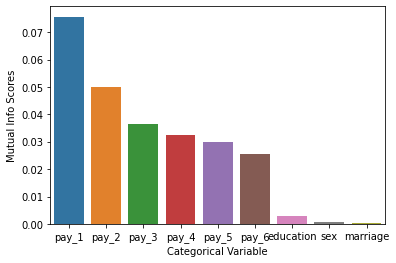

In [494]:
#now let us look into mutual info to see the dependability of each categorical variable on target variable
def calculate_mi(series):
  return mutual_info_score(series,df_train_full.default_payment_next_month)
df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
ax = sns.barplot(x = df_mi.index, y="MI", data=df_mi)
ax.set_xlabel("Categorical Variable")
ax.set_ylabel("Mutual Info Scores")
plt.show()

As we can see that pay_1 , pay_2, pay_3 are most important feature while sex and marriage are least

###Correlation Coefficient

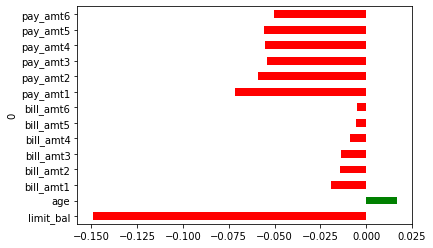

In [495]:
#Now we also need to look dependability of target variable on numerical feature
corr = df_train_full[numerical].corrwith((df_train_full.default_payment_next_month).astype(int)).to_frame("values")
corr['values'].plot(kind='barh',
                    color=(corr['values']> 0).map({True: 'g',
                                                    False: 'r'}))

As we can see that only age is positively related to target variable, it also means the elder people have more chance of getting default
Other variable such as paid amount and billed amount are negatively correlated so people who have paid more and had been billed more have less chances to get default, which makes sense

##Feature Engineering

In [496]:
#We will use one-hot encoding to vectorize our categorical variables
#First we need to convert our DataFrame into a dictionary
train_dict  = df_train.to_dict('records')
#now if we look into the first element of this list
train_dict[0]

{'age': 32,
 'bill_amt1': 0,
 'bill_amt2': 0,
 'bill_amt3': 0,
 'bill_amt4': 0,
 'bill_amt5': 0,
 'bill_amt6': 0,
 'education': 2,
 'id': 26116,
 'limit_bal': 200000,
 'marriage': 2,
 'pay_1': 1,
 'pay_2': -1,
 'pay_3': -1,
 'pay_4': -1,
 'pay_5': -1,
 'pay_6': -1,
 'pay_amt1': 0,
 'pay_amt2': 0,
 'pay_amt3': 0,
 'pay_amt4': 0,
 'pay_amt5': 0,
 'pay_amt6': 0,
 'sex': 2}

In [497]:
#we can see that values of categorical variable are in int type. This will cause 
#problems while vectorizing so first convert datatypes of categorical variable values to str

In [498]:
for item in train_dict:
    for key, value in item.items():
      if key in categorical:
        item[key] = str(value)

In [499]:
#now look into the first item of our list of dictionaries
train_dict[0]

{'age': 32,
 'bill_amt1': 0,
 'bill_amt2': 0,
 'bill_amt3': 0,
 'bill_amt4': 0,
 'bill_amt5': 0,
 'bill_amt6': 0,
 'education': '2',
 'id': 26116,
 'limit_bal': 200000,
 'marriage': '2',
 'pay_1': '1',
 'pay_2': '-1',
 'pay_3': '-1',
 'pay_4': '-1',
 'pay_5': '-1',
 'pay_6': '-1',
 'pay_amt1': 0,
 'pay_amt2': 0,
 'pay_amt3': 0,
 'pay_amt4': 0,
 'pay_amt5': 0,
 'pay_amt6': 0,
 'sex': '2'}

In [500]:
#Now we will use dictvectorizer to convert our df into vector
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [501]:
#Now we will convert this dictionary to matrix by transform method
X_train = dv.transform(train_dict)
X_train[0]

array([3.2000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 2.6116e+04, 2.0000e+05, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e

In [502]:
#all the values are 0's or 1's except three they are our numerical variables
dv.get_feature_names()

['age',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'education=1',
 'education=2',
 'education=3',
 'education=4',
 'id',
 'limit_bal',
 'marriage=1',
 'marriage=2',
 'marriage=3',
 'pay_1=-1',
 'pay_1=1',
 'pay_1=2',
 'pay_1=3',
 'pay_1=4',
 'pay_1=5',
 'pay_1=6',
 'pay_1=7',
 'pay_1=8',
 'pay_2=-1',
 'pay_2=1',
 'pay_2=2',
 'pay_2=3',
 'pay_2=4',
 'pay_2=5',
 'pay_2=6',
 'pay_2=7',
 'pay_3=-1',
 'pay_3=1',
 'pay_3=2',
 'pay_3=3',
 'pay_3=4',
 'pay_3=5',
 'pay_3=6',
 'pay_3=7',
 'pay_3=8',
 'pay_4=-1',
 'pay_4=1',
 'pay_4=2',
 'pay_4=3',
 'pay_4=4',
 'pay_4=5',
 'pay_4=6',
 'pay_4=7',
 'pay_4=8',
 'pay_5=-1',
 'pay_5=2',
 'pay_5=3',
 'pay_5=4',
 'pay_5=5',
 'pay_5=6',
 'pay_5=7',
 'pay_5=8',
 'pay_6=-1',
 'pay_6=2',
 'pay_6=3',
 'pay_6=4',
 'pay_6=5',
 'pay_6=6',
 'pay_6=7',
 'pay_6=8',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'sex=1',
 'sex=2']

##Logistic Regression

In [503]:
#we will first train our data using logistic regression
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train , y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [504]:
#now let us predict our target variable using this model
dict_val = df_val[categorical+numerical].to_dict('records')
X_val = dv.transform(dict_val)

In [505]:
#now we will predict our values
y_pred = model.predict_proba(X_val)
y_pred

array([[0.91475279, 0.08524721],
       [0.66848926, 0.33151074],
       [0.57441598, 0.42558402],
       ...,
       [0.59557056, 0.40442944],
       [0.62401863, 0.37598137],
       [0.63343475, 0.36656525]])

In [506]:
#we only need the probablity of default of a customer
y_pred = y_pred[:,1]

In [507]:
#now we don't need probablities but we need a hard prediction that customer will get default or not
#so we set a threshold on probanlity and convert it into hard predictions
default = y_pred>=0.5

##Evaluating the Model

In [508]:
#we will calculate the accuracy by first comparing values in y_val and default after taking the mean will
#tell us probablity of values matched
(y_val==default).mean()

0.7720959595959596

In [509]:
#We can see that our model done pretty well by predicting 77% values correct
#but accuracy score is not a good parameter to evaluate a binary classification problem.
#We need to see some other evaluation metrics

####Confusion Table

In [510]:
tn, fp, fn, tp = confusion_matrix(y_val , default).ravel()
cf_matrix = np.array([[tn , fp],
                [fn , tp]])
print(cf_matrix)

[[6113    0]
 [1805    2]]


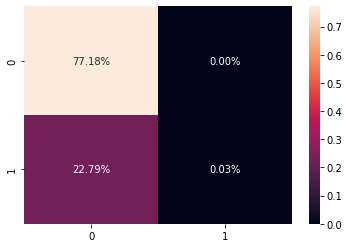

In [511]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

In [512]:
#now we can clearly see that our model did good job in predicting people who are not going to default,
#but it did terrible in identifying people who are going to default as almost 23% people are wrongly identified

In [513]:
#now let us look for thresholds that make our model more effective
#let us calculate precision and recall values for differnt theresholds
precisions = []
recalls = []
thresholds = np.linspace(0 , 1 ,101)
for t in thresholds:
  tn, fp, fn, tp = confusion_matrix(y_val , y_pred>=t).ravel()
  precision = tp / (tp+fp)
  recall = tp/(tp+fn)
  precisions.append(precision)
  recalls.append(recall)
  warnings.filterwarnings('ignore')

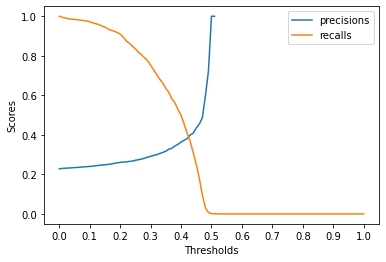

In [514]:
plt.plot(thresholds , precisions , label = "precisions")
plt.plot(thresholds ,recalls , label = "recalls")
plt.xlabel("Thresholds")
plt.ylabel("Scores")
plt.xticks(np.arange(0, 1+0.1, 0.1))
plt.legend()

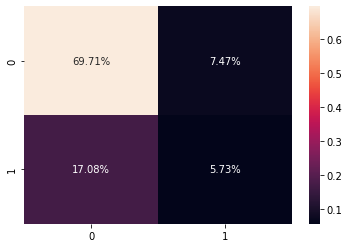

In [515]:
#now let us take the threshold as 0.45 and look if our connfusion matrix improve.
tn, fp, fn, tp = confusion_matrix(y_val , y_pred>=0.45).ravel()
cf_matrix = np.array([[tn , fp],
                [fn , tp]])
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

In [516]:
#our model predicted true positive much better than before.

In [517]:
#now we will draw a f1 score curve to find best threshold for our model.
f1_scores=[]
for t in thresholds:
  f1 = f1_score(y_val , y_pred>=t)
  f1_scores.append(f1)


In [518]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.41,0.429), **kw)



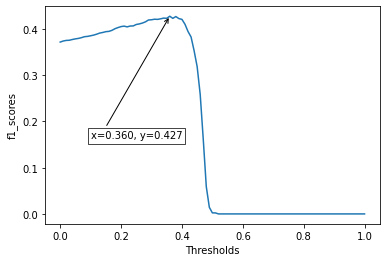

In [519]:
fig, ax = plt.subplots()
ax.plot(thresholds , f1_scores)
annot_max(pd.Series(thresholds) , pd.Series(f1_scores) , ax=ax)
plt.xlabel("Thresholds")
plt.ylabel("f1_scores")
plt.show()

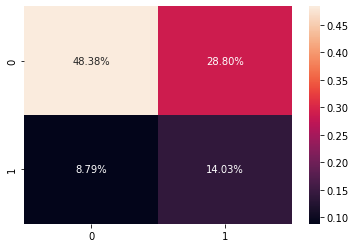

In [520]:
#we can see that max f1 score can be achieved with threshold of 0.360
#now let us take the threshold as 0.41 and look if our connfusion matrix improve.
tn, fp, fn, tp = confusion_matrix(y_val , y_pred>=0.36).ravel()
cf_matrix = np.array([[tn , fp],
                [fn , tp]])
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

##Parameter Tuning

####K-Folds Cross validations

In [521]:
#first we will make a function for training data, so we dont have to repeat it.
def train(df,y,C):
  
  cat = df[categorical+numerical].to_dict("records")
  dv = DictVectorizer(sparse=False)
  dv.fit(cat)
  X = dv.transform(cat)
  model = LogisticRegression(solver = "liblinear",C=C)
  model.fit(X,y)
  return dv, model

In [522]:
#also for predicting process, we make a function
def predict(df, dv , model):
  cat = df[categorical+numerical].to_dict("records")
  X = dv.transform(cat)
  y_pred = model.predict_proba(X)[:,1]
  return y_pred

In [523]:
#now let us look into f1 scores for different parameters

kfold = KFold(n_splits=10,shuffle=True , random_state=1)
for c in [0.001, 0.01, 0.1, 0.5, 1, 10]:
  f1_scores = []
  for train_idx , val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    y_train = df_train.default_payment_next_month.values
    y_val = df_val.default_payment_next_month.values

    dv,model = train(df_train, (y_train).astype(int),C = c)
    y_pred = predict(df_val , dv, model)
    f1 = f1_score((y_val).astype(int), (y_pred>=0.36).astype(int))
    f1_scores.append(f1)
  print('C = %s f1_scores = %0.3f ± %0.3f'% (c , np.mean(f1_scores), np.std(f1_scores)))

C = 0.001 f1_scores = 0.280 ± 0.065
C = 0.01 f1_scores = 0.279 ± 0.054
C = 0.1 f1_scores = 0.277 ± 0.054
C = 0.5 f1_scores = 0.251 ± 0.054
C = 1 f1_scores = 0.266 ± 0.055
C = 10 f1_scores = 0.246 ± 0.056


we can see that best we can get best f1_score for c = 0.001 and threshold = 0.36

In [539]:
#now we will train our model using above criteria
#We can see that for C>0.1 auc score does'nt grow anymore. So we use C=0.1 as our final parameter
y_train = df_train_full.default_payment_next_month.values
y_test = df_test.default_payment_next_month.values

dv, model = train(df_train_full , (y_train).astype(int) , C=0.01)
y_pred = predict(df_test , dv , model )

f1 = f1_score((y_test).astype(int), (y_pred>=0.36).astype(int))
print('f1 score = %.3f'%f1)


f1 score = 0.257


##Real World Application

In [ ]:
#Now let us assume following are the attributes of our customer, we like to know if the customer 
#will get default or not
customer = {
  'age': 41,
 'bill_amt1': 1448,
 'bill_amt2': 1261,
 'bill_amt3': 630,
 'bill_amt4': 240,
 'bill_amt5': 690,
 'bill_amt6': 150,
 'education': 2,
 'id': 2673,
 'limit_bal': 30000,
 'marriage': 2,
 'pay_1': -1,
 'pay_2': -1,
 'pay_3': -1,
 'pay_4': -1,
 'pay_5': -1,
 'pay_6': 2,
 'pay_amt1': 1261,
 'pay_amt2': 630,
 'pay_amt3': 0,
 'pay_amt4': 840,
 'pay_amt5': 0,
 'pay_amt6': 780,
 'sex': 2
}
X_test = dv.transform([customer])
X_test

array([[   41.,  1448.,  1261.,   630.,   240.,   690.,   150.,     0.,
            0.,     0.,     0.,  2673., 30000.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,  1261.,   630.,     0.,   840.,     0.,
          780.,     0.,     0.]])

In [ ]:
#Now we will predict if this customer will default or not
y_pred = model.predict_proba(X_test)

In [ ]:
#We only need the probablity of churn so
y_pred = y_pred[0,1]
#also we need a answer in yes or no , so
print((y_pred>=0.5).astype(int))

0


In [ ]:
#As we can see that our model correctly predicted 0 that means the customer will not get default. 

We have build a model using logistic regression to predict whether the customer of bank will get default or not. We first did some data preprocessing, then we balance our dataset as it was highly imbalanced. We also did feature engineering to vectorize our training set. 
Our model gey 77% accuracy and rightly predicted our given feature of customer.
